In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, train_test_split

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
test3_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

#### Training Data

In [3]:
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 'size_sqft', 'no_fee', 'addr_zip', 'floornumber', 'floor_count', 
    'has_doorman', 'has_fireplace', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage',
    'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden'

]

train_features = train_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

#### Handle Training Data Missing Values

In [4]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)    
    return df

#missing_columns = ["year_built", "min_to_subway", "floornumber"]
#for feature in missing_columns:
#    test1_features[feature + '_imp'] = [feature]
#    test1_features = random_imputation(test1_features, feature)

test1_features = test1_df[feature_cols] 
test1_features = test1_features.fillna(train_features.median(), axis=0)

#  <font color=green> Test 1 <font>

#### Linear Regression Model

In [5]:
lreg = LinearRegression()
lreg.fit(train_features, train_target)

test1_df['predicted'] = lreg.predict(test1_features)
mean_squared_error(test1_df['rent'], test1_df['predicted'])
#test_df['predicted'].to_csv('linear.csv', header=True)
#3301338.418329301

3297096.0901556876

#### Random Forest Regression Model

In [6]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 1, max_depth=42)
regressor.fit(train_features, train_target)

test1_df['predicted'] = regressor.predict(test1_features)
mean_squared_error(test1_df['rent'], test1_df['predicted'])
#test_df['predicted'].to_csv('linear.csv', header=True)
#3301338.418329301

1746490.3228272318

#### Combine Data, Predict Values for Test 2

In [7]:
master_df = train_df.append(test1_df, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']

regressor.fit(master_features, master_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=42,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

#  <font color=green> Test 2 <font>


#### Handle Training Data Missing Values

In [8]:
test2_features = test1_df[feature_cols] 
test2_features = test1_features.fillna(train_features.median(), axis=0)

#### Random Forest Regression Model

In [9]:
test2_df['predicted'] = regressor.predict(test2_features)

In [10]:
test2_df['predicted'].to_csv('test2_results.csv', header=True)

#  <font color=green> Test 3 <font>


###  <font color=blue> Importing New Data <font>

In [11]:
dob_complaints_df = pd.read_csv('C:/Users/new/Downloads/data/DOB_Complaints_Received.csv', index_col=0)
dob_violations_df = pd.read_csv('C:/Users/new/Downloads/data/DOB_Violations.csv', index_col=0)
property_value_df = pd.read_csv('C:/Users/new/Downloads/data/Revised_Notice_of_Property_Value__RNOPV_.csv', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###  <font color=blue> Clean and Filter Data <font>

In [12]:
property_value_df = property_value_df[['BIN','ORIGINAL MARKET VALUE']].copy()

In [13]:
dob_violations_df['ISSUE_DATE'] =  pd.to_datetime(dob_violations_df['ISSUE_DATE'], format='%Y%m%d', errors='coerce')
dob_violations_df = dob_violations_df[(dob_violations_df['ISSUE_DATE'].dt.year > 2010) ]
bin_violations = dob_violations_df.BIN.value_counts().reset_index().rename(columns={'index': 'z', 0: 'count'})

In [36]:
master_df = train_df.append(test1_df, sort=False)
master_df = pd.merge(left=master_df,right=bin_violations,  how='left', left_on='bin', right_on='z')
master_df.rename(columns={'BIN': 'dob_violations_count'}, inplace=True)
master_df.drop('z', axis=1, inplace=True)

test1_df = pd.merge(left=master_df,right=bin_violations,  how='left', left_on='bin', right_on='z')
test1_df.rename(columns={'BIN': 'dob_violations_count'}, inplace=True)
test1_df.drop('z', axis=1, inplace=True)

test2_df = pd.merge(left=test2_df,right=bin_violations,  how='left', left_on='bin', right_on='z')
test2_df.rename(columns={'BIN': 'dob_violations_count'}, inplace=True)
test2_df.drop('z', axis=1, inplace=True)

In [37]:
master_df = pd.merge(left=master_df,right=property_value_df,  how='left', left_on='bin', right_on='ORIGINAL MARKET VALUE')
master_df.rename(columns={'ORIGINAL MARKET VALUE': 'market_value'}, inplace=True)
master_df.drop('BIN', axis=1, inplace=True)

In [38]:
dob_complaints_df['Date Entered'] =  pd.to_datetime(dob_complaints_df['Date Entered'], format='%m/%d/%Y')
dob_complaints_df  = dob_complaints_df[(dob_complaints_df['Date Entered'].dt.year > 2010) ]
bin_complaints = dob_complaints_df.BIN.value_counts().reset_index().rename(columns={'index': 'z', 0: 'count'})

In [39]:
master_df = pd.merge(left=master_df,right=bin_complaints,  how='left', left_on='bin', right_on='z')
master_df.rename(columns={'BIN': 'dob_complaints_count'}, inplace=True)
master_df.drop('z', axis=1, inplace=True)

test1_df = pd.merge(left=test1_df,right=bin_complaints,  how='left', left_on='bin', right_on='z')
test1_df.rename(columns={'BIN': 'dob_complaints_count'}, inplace=True)
test1_df.drop('z', axis=1, inplace=True)

test2_df = pd.merge(left=test2_df,right=bin_complaints,  how='left', left_on='bin', right_on='z')
test2_df.rename(columns={'BIN': 'dob_complaints_count'}, inplace=True)
test2_df.drop('z', axis=1, inplace=True)

In [40]:
#[14061 rows x 42 columns]> dob_violations_df = dob_violations_df[(dob_violations_df['ISSUE_DATE'].dt.year > 2010) ]
master_df = master_df[(master_df['size_sqft'] < 2300) ]
master_df = master_df[(master_df['size_sqft'] > 0) ]
master_df = master_df[(master_df['rent'] < 15000) ]

In [41]:
#tax_df = pd.read_csv('C:/Users/new/Downloads/data/Property_Valuation_and_Assessment_data_Tax_Classes_2_3_4.csv', index_col=0)

In [42]:
#tax_df
#master_df.sample(5).transpose()

## <font color=blue> Visualization of Data <font>

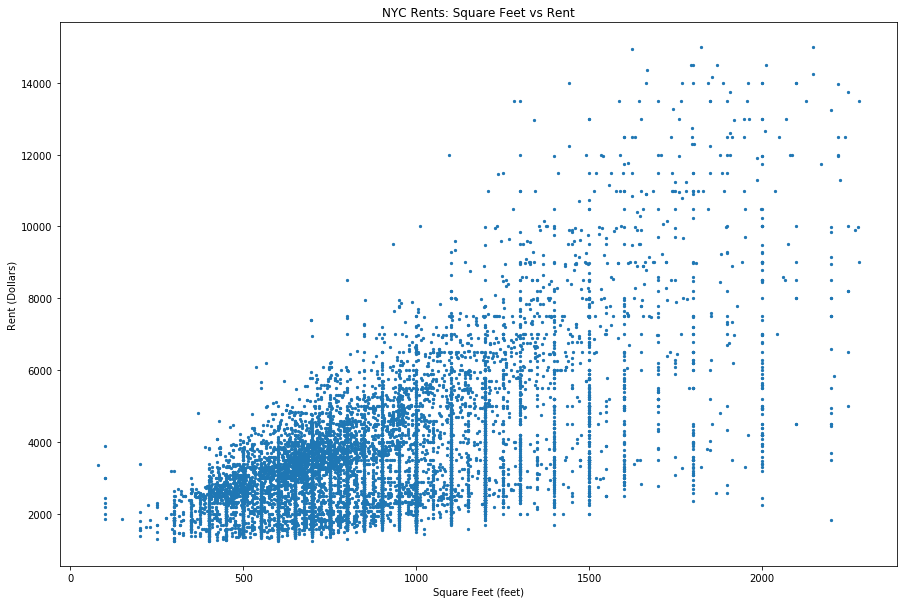

In [43]:
#master_df.plot.scatter(x='size_sqft', y='rent')#.title('Square Feet vs Rent')

x= master_df.size_sqft; y = master_df.rent
plt.figure(figsize=(15,10))
plt.scatter(x,y,s=5)
plt.title("NYC Rents: Square Feet vs Rent")
plt.xlabel("Square Feet (feet)")
plt.ylabel("Rent (Dollars)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


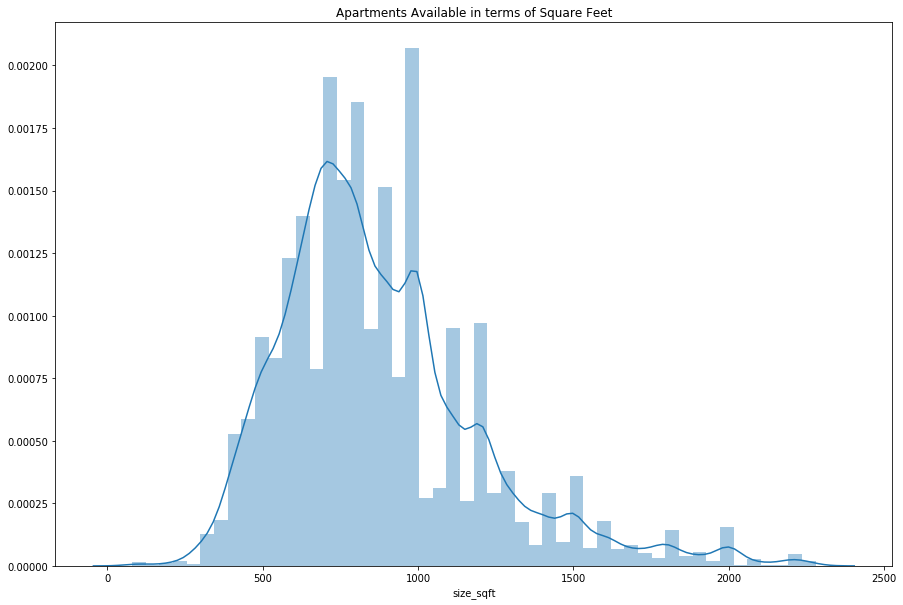

In [44]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Apartments Available in terms of Square Feet')
seabornInstance.distplot(master_df['size_sqft'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


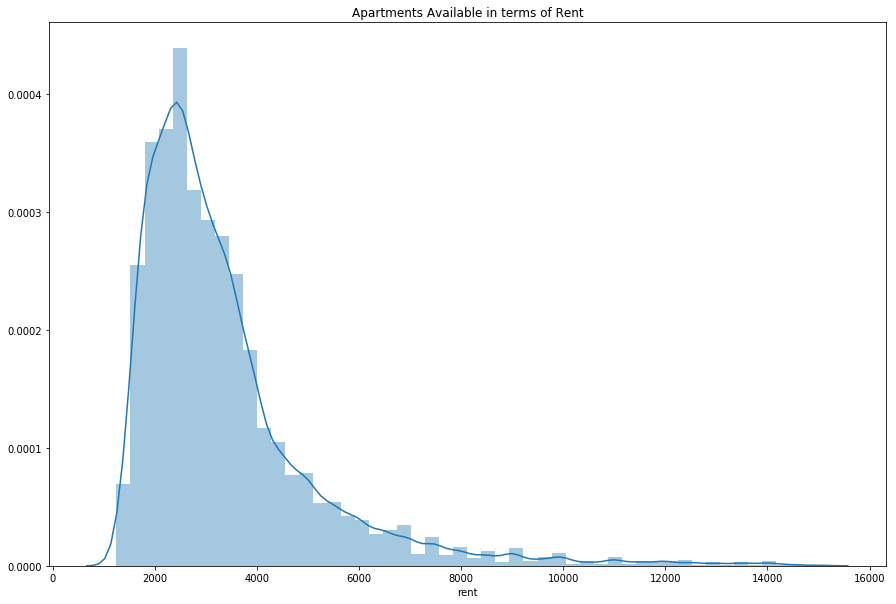

In [45]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Apartments Available in terms of Rent')
seabornInstance.distplot(master_df['rent'])

In [24]:
'''
X_train = master_df.values[0:12000]
X_test = master_df.values[12000:]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

state = 12  
test_size = 0.30  
  
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=test_size, random_state=state)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
'''

'\nX_train = master_df.values[0:12000]\nX_test = master_df.values[12000:]\n\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\nstate = 12  \ntest_size = 0.30  \n  \n#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=test_size, random_state=state)\n\n#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\n'

In [47]:
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 'size_sqft', 'no_fee', 'addr_zip', 'floornumber', 'floor_count', 
    'has_doorman', 'has_fireplace', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage',
    'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'dob_complaints_count'

]

train_features = master_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

train_features = master_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = master_df['rent']

lreg = LinearRegression()
lreg.fit(train_features, train_target)

regressor = RandomForestRegressor(n_estimators = 50, random_state = 1, max_depth=42)
regressor.fit(train_features, train_target)

test_features = test1_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

test1_df['predicted'] = regressor.predict(test_features)

mean_squared_error(test1_df['rent'], test1_df['predicted'])
#3487743.630438365

2731745.983878116

In [31]:
#master_df.sample(1).transpose()